In [1]:
### Importing libraries

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [19]:
#Step1) Data gathering

In [73]:
df=pd.read_csv("bank.csv")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [76]:
df.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
5687,54,housemaid,married,primary,no,3304,no,yes,cellular,25,jul,90,7,-1,0,unknown,no
9402,31,technician,single,tertiary,no,424,no,no,cellular,29,jan,106,1,161,2,failure,no
4424,25,student,single,secondary,no,4147,no,no,cellular,14,aug,211,3,-1,0,unknown,yes
1865,47,retired,married,primary,no,1374,no,yes,telephone,8,may,479,2,359,3,failure,yes
3142,37,technician,single,secondary,no,265,yes,yes,cellular,3,feb,140,1,366,2,failure,yes


In [77]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [22]:
#Checking df structure

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [79]:
# describe df numerical columns
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [80]:
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

job
['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
marital
['married' 'single' 'divorced']
education
['secondary' 'tertiary' 'primary' 'unknown']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome
['unknown' 'other' 'failure' 'success']
deposit
['yes' 'no']


#Data Description

This is the classic marketing bank dataset uploaded originally in the UCI Machine Learning Repository.
The dataset gives you information about a marketing campaign of a financial institution in which you will have to analyze
in order to find ways to look for future strategies in order to improve future marketing campaigns for the bank.

#Feature

age | int64 | age in years
job | object | type of job (categorical: ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed' 'student']) 
3. marital | object | marital status (categorical: ['married' 'single' 'divorced']) 
4. education | Object | education background (categorical: ['secondary' 'tertiary' 'primary' 'unknown']) 
5. default | Object | has credit in default? (categorical: ['no' 'yes']) 6. balance | int64 | Balance of the individual 
7. housing | object | has housing loan? (categorical: ['yes' 'no']) 
8. loan | object | has personal loan? (categorical: ['no' 'yes']) 
9. contact | object | contact communication type (categorical: ['unknown' 'cellular' 'telephone']) 
10. day | int64 | last contact day of the week (categorical: 'mon','tue','wed','thu','fri') 
11. month | object | last contact month of year (categorical: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']) 
12. duration | int64 | last contact duration, in seconds (numeric) 
13. campaign | int64 | number of contacts performed during this campaign and for this client 
14. pdays | int64 | number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted) 15. previous | int64 | number of contacts performed before this campaign and for this client 16. poutcome | object | outcome of the previous marketing campaign (categorical: ['unknown' 'other' 'failure' 'success'])

#Label

deposit | object | has the client subscribed a term deposit? (binary: 'yes','no')

# EDA

#Exploratory Data Analysis
Find Unwanted Columns
Find Missing Values
Find Features with one value
Explore the Categorical Features
Find Categorical Feature Distribution
Relationship between Categorical Features and Label
Explore the Numerical Features
Find Discrete Numerical Features
Relation between Discrete numerical Features and Labels
Find Continous Numerical Features
Distribution of Continous Numerical Features
Relation between Continous numerical Features and Labels
Find Outliers in numerical features
Explore the Correlation between numerical features
Find Pair Plot
Check the Data set is balanced or not based on target values in classification

In [ ]:
#1. Find Unwanted Columns

Take-away:

these is no unwanted column present in given dataset to remove

In [ ]:
#2. Find Missing Values

In [81]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [ ]:
##outcome-no missing values found

In [ ]:
#3. Find Features with One Value

In [82]:
df.nunique()

age            76
job            12
marital         3
education       4
default         2
balance      3805
housing         2
loan            2
contact         3
day            31
month          12
duration     1428
campaign       36
pdays         472
previous       34
poutcome        4
deposit         2
dtype: int64

In [ ]:
##there is no feature having one unique value

In [ ]:
 #4.expolre the categorical feature
    

In [83]:
categorical_features=[feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in ['y']))]
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'deposit']

In [84]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is job and number of categories are 12
The feature is marital and number of categories are 3
The feature is education and number of categories are 4
The feature is default and number of categories are 2
The feature is housing and number of categories are 2
The feature is loan and number of categories are 2
The feature is contact and number of categories are 3
The feature is month and number of categories are 12
The feature is poutcome and number of categories are 4
The feature is deposit and number of categories are 2


#Take-away:

there are 9 categorical features
feature job and month has highest number of categorical values

In [ ]:
#5. Find Categorical Feature Distribution

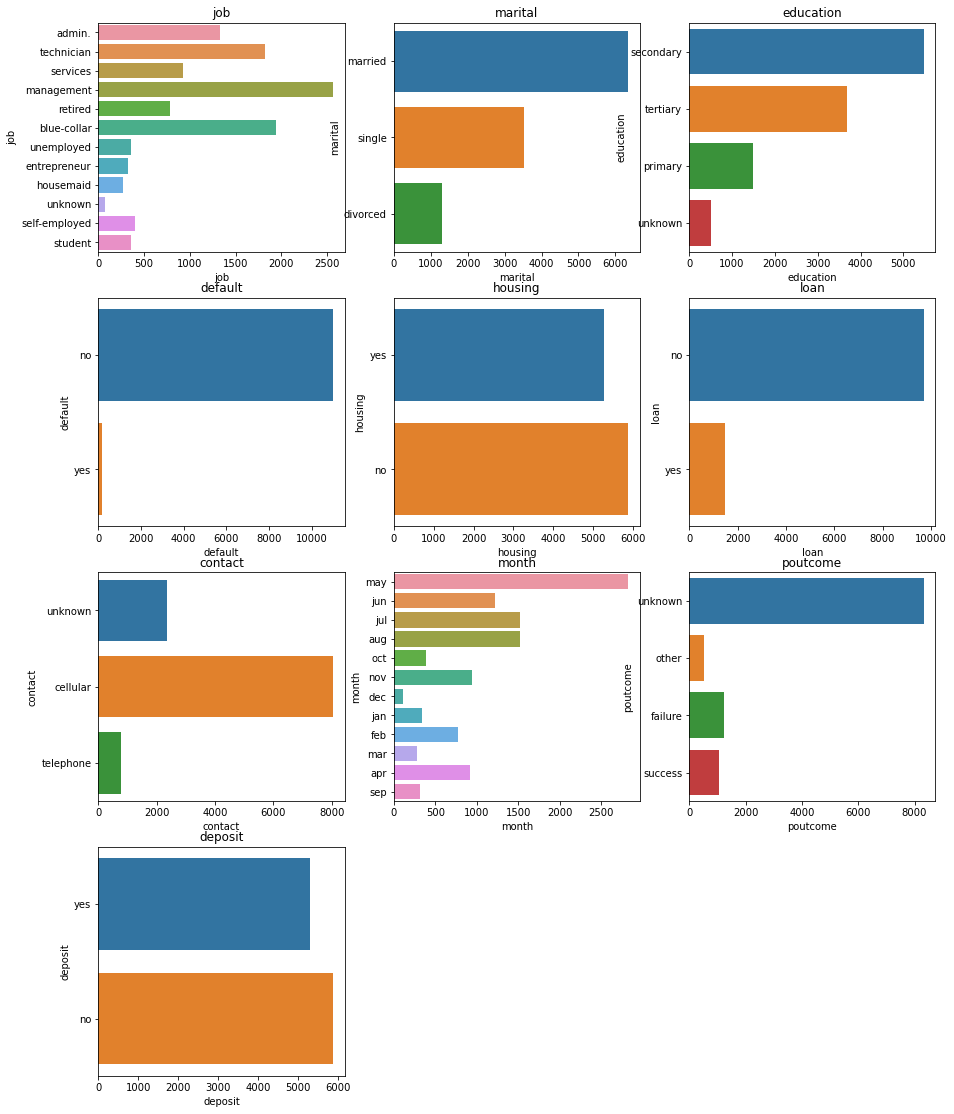

In [85]:
#check count based on categorical features
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for categorical_feature in categorical_features:
    ax = plt.subplot(16,3,plotnumber)
    sns.countplot(y=categorical_feature,data=df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

In [ ]:
#Take-away:

client with job type as management records are high in given dataset and housemaid are very less
client who married are high in records in given dataset and divorced are less
client whoes education background is secondary are in high numbers in given dataset
defualt feature seems to be does not play importand role as it has value of no at high ratio to value yes which can drop
data in month of may is high and less in dec

In [ ]:
#6. Relationship between Categorical Features and Label

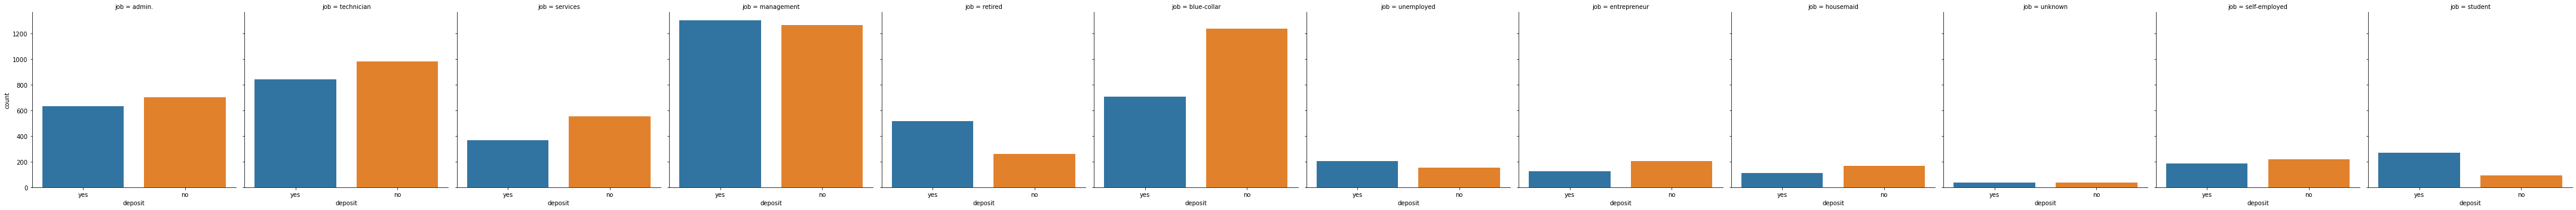

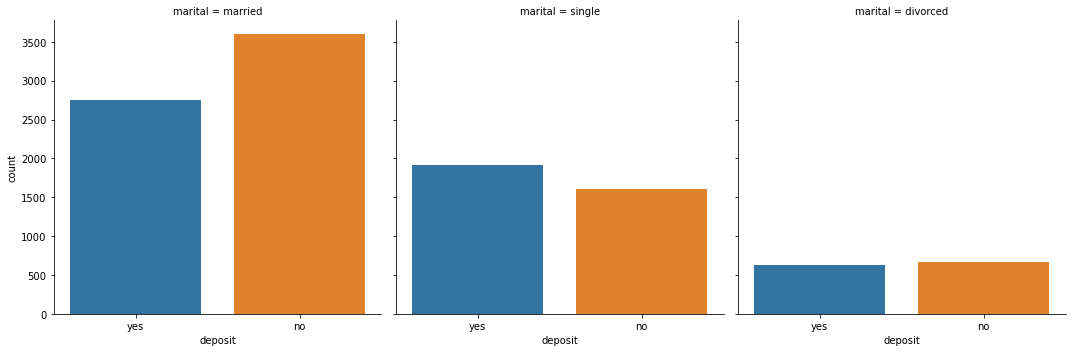

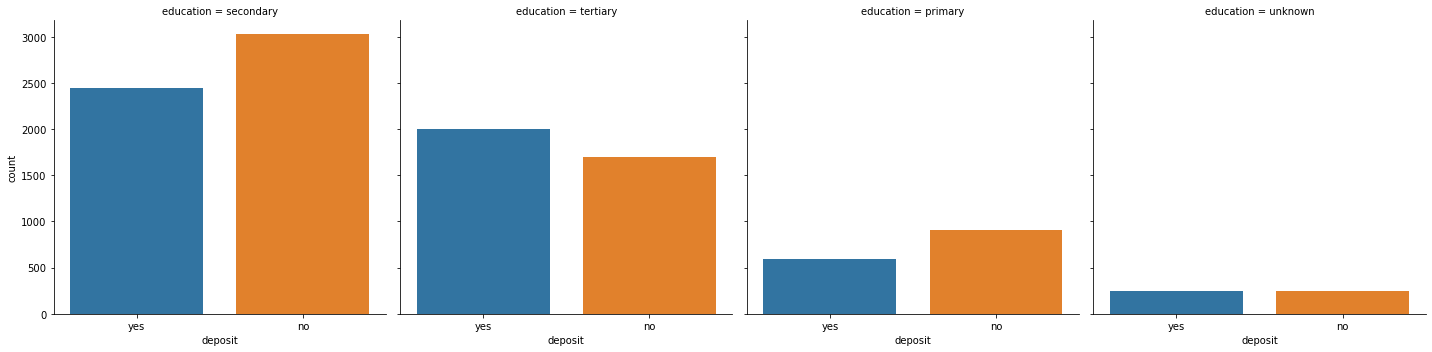

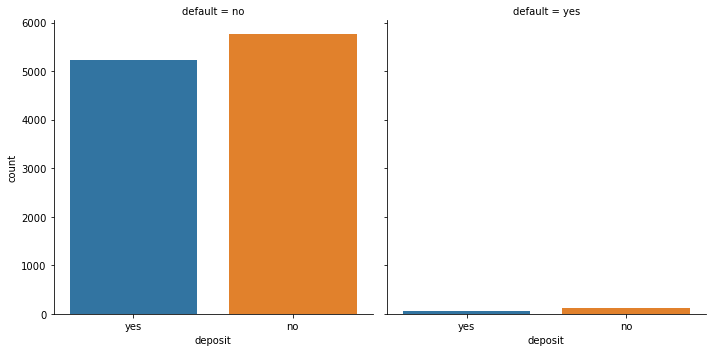

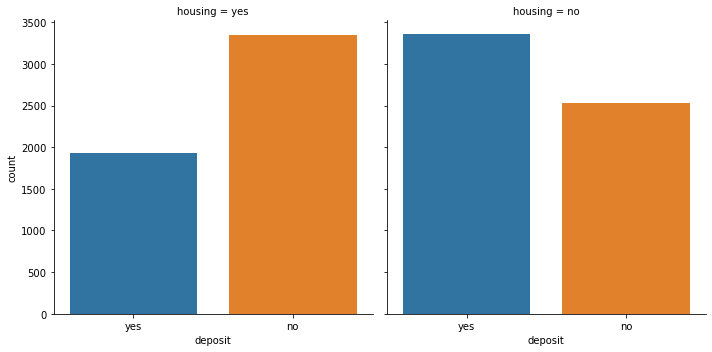

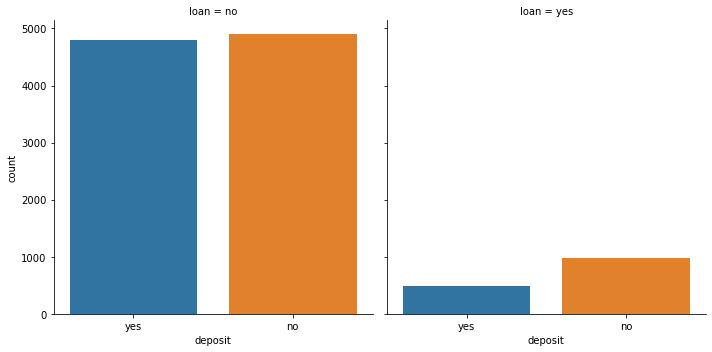

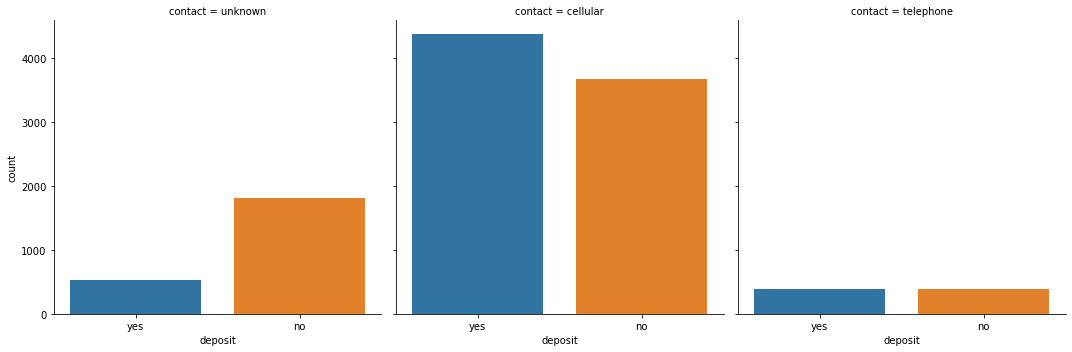

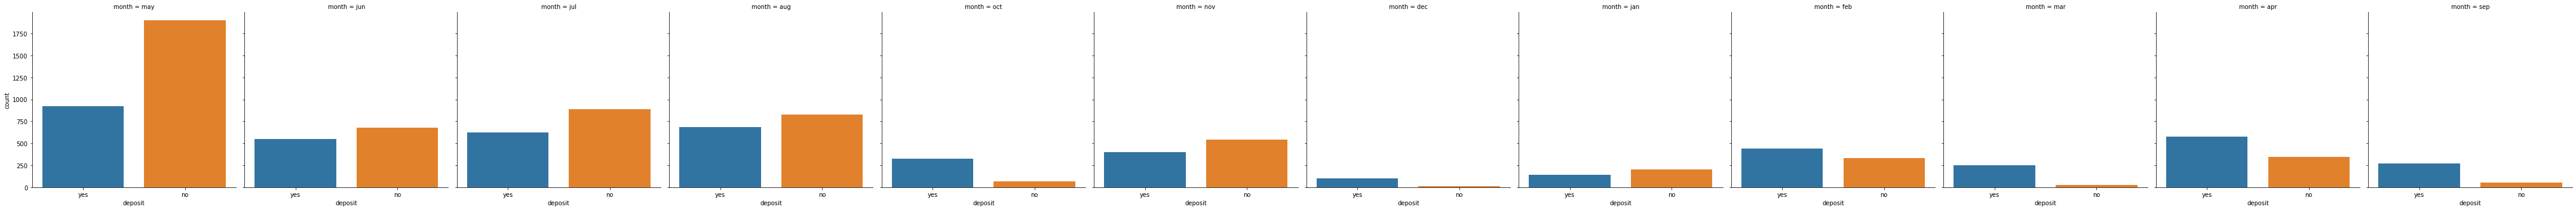

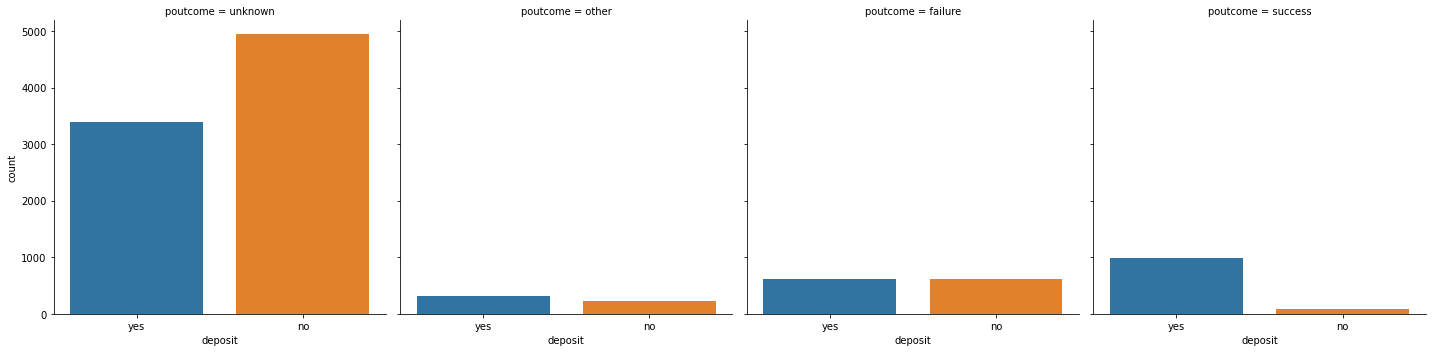

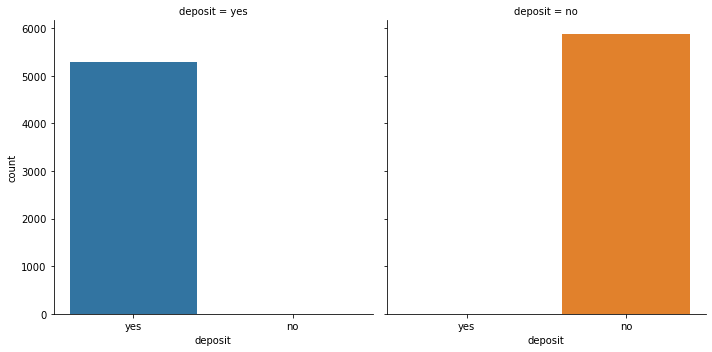

In [89]:
#check target label split over categorical features
#Find out the relationship between categorical variable and dependent variable
for categorical_feature in categorical_features:
    sns.catplot(x='deposit', col=categorical_feature, kind='count', data= df)
plt.show()

In [24]:
#Check target label split over categorical features and find the count
for categorical_feature in categorical_features:
    print(df.groupby(['deposit',categorical_feature]).size())

y  job         
0  admin           139
   blue            278
   entrepreneur     64
   housemaid        40
   management      287
   retired          63
   self             58
   services        124
   student          21
   technician      209
   unemployed       39
   unknown           5
1  admin            22
   blue             26
   entrepreneur      4
   housemaid         2
   management       43
   retired          11
   self              8
   services         13
   student           9
   technician       25
   unemployed        9
   unknown           1
dtype: int64
y  marital 
0  divorced    156
   married     832
   single      339
1  divorced     23
   married      95
   single       55
dtype: int64
y  education
0  primary      220
   secondary    683
   tertiary     368
   unknown       56
1  primary       18
   secondary     80
   tertiary      70
   unknown        5
dtype: int64
y  default
0  no         1302
   yes          25
1  no          170
   yes           3
dtype: 

In [90]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['deposit']))]
print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  7


,age,balance,day,duration,campaign,pdays,previous
0,59,2343,5,1042,1,-1,0
1,56,45,5,1467,1,-1,0
2,41,1270,5,1389,1,-1,0
3,55,2476,5,579,1,-1,0
4,54,184,5,673,2,-1,0


In [91]:
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 0


In [92]:
continuous_features=[feature for feature in numerical_features if feature not in discrete_feature+['y']]
print("Continuous feature Count {}".format(len(continuous_features)))

Continuous feature Count 7


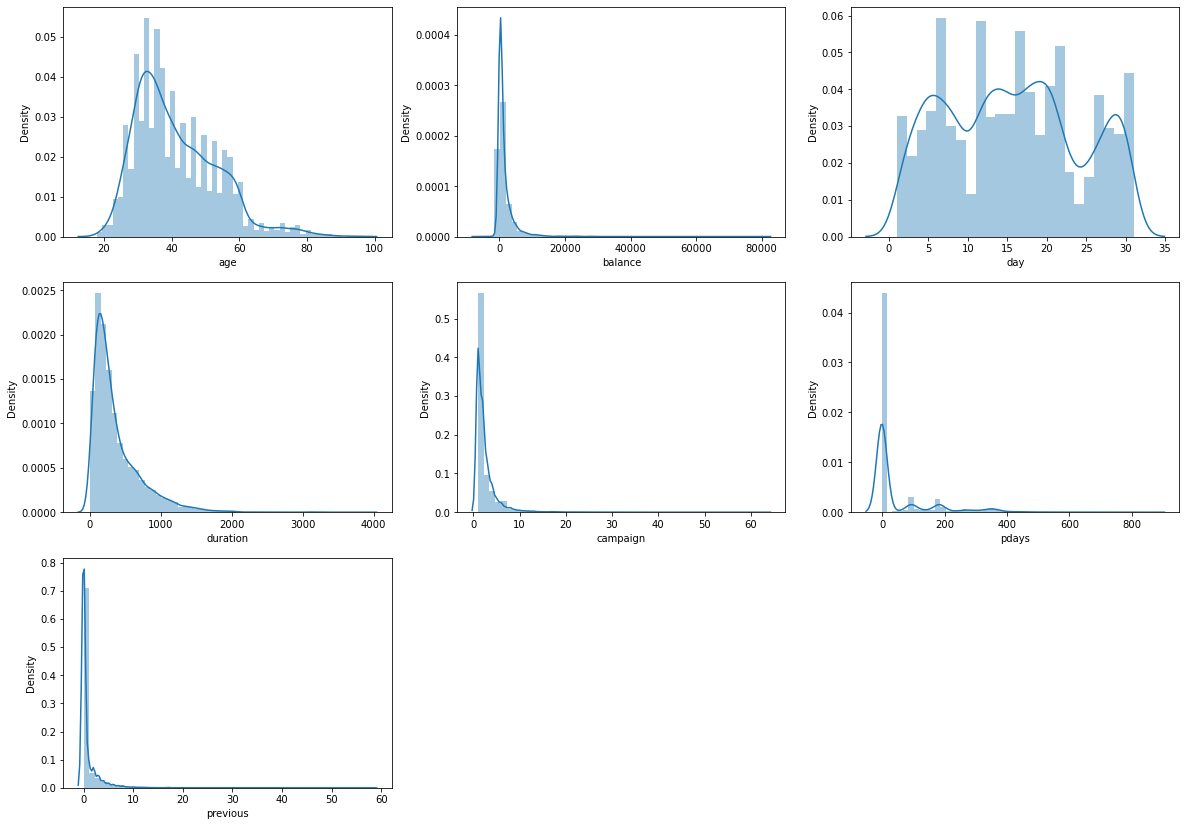

In [93]:
#plot a univariate distribution of continues observations
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for continuous_feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(df[continuous_feature])
    plt.xlabel(continuous_feature)
    plotnumber+=1
plt.show()

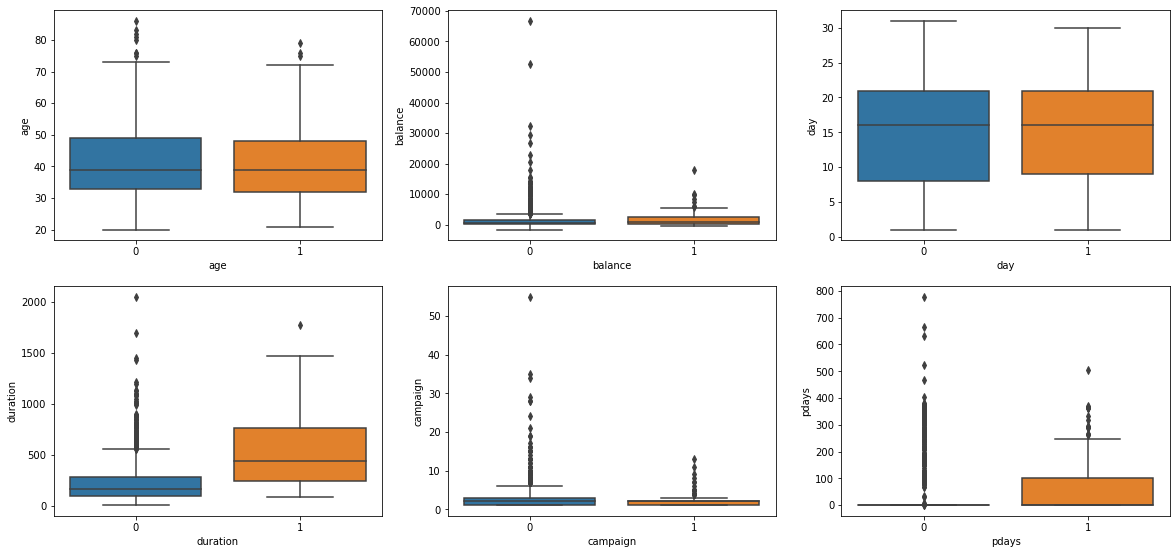

In [30]:
#boxplot to show target distribution with respect numerical features
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x="y", y= df[feature], data=df)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

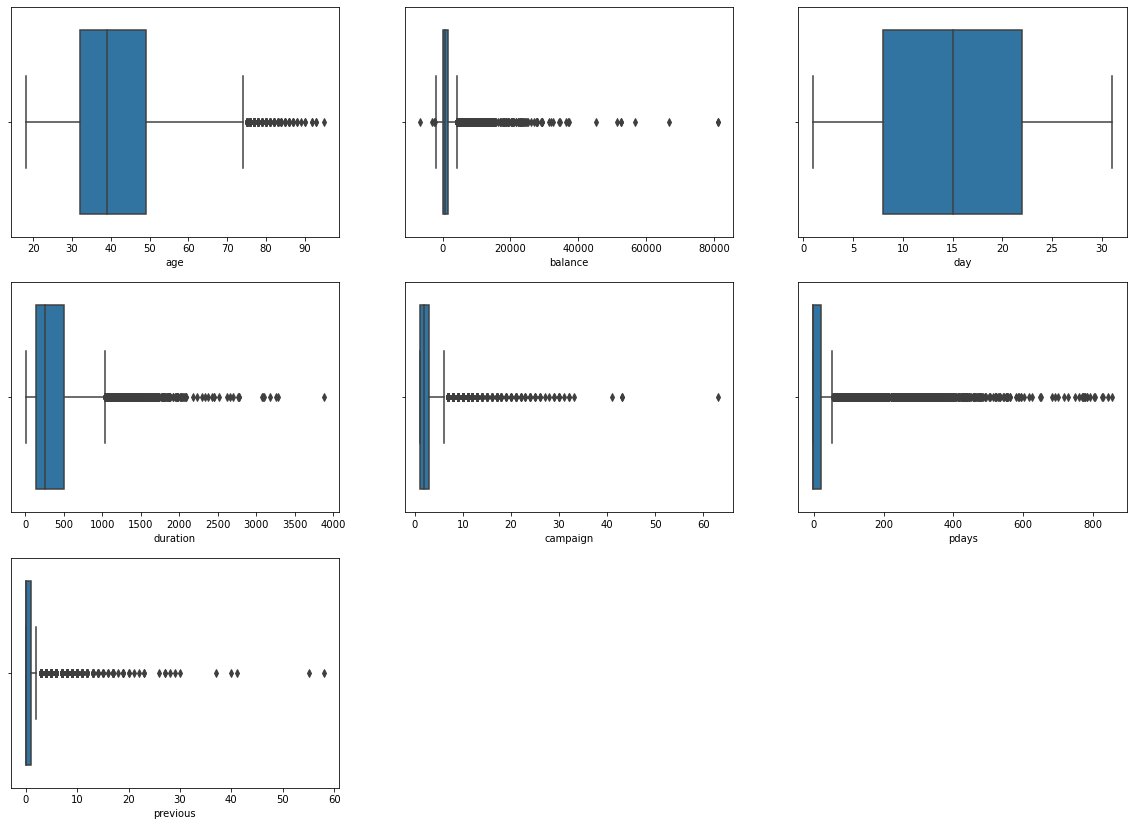

In [94]:
#boxplot on numerical features to find outliers
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

# Explore the Correlation between numerical features

<AxesSubplot:>

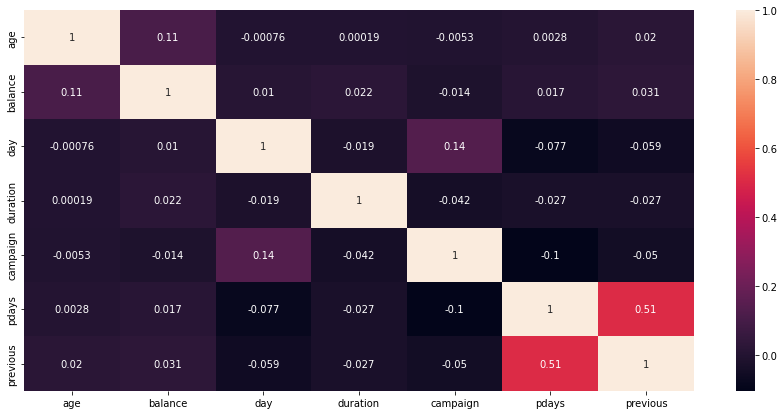

In [95]:
cor_mat=df.corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)

# Check the Data set is balanced or not based on target values in classification

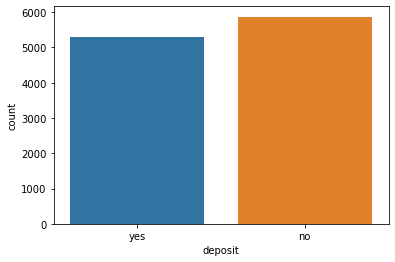

In [96]:
sns.countplot(x='deposit',data=df)
plt.show()

In [97]:
df['deposit'].groupby(df['deposit']).count()

deposit
no     5873
yes    5289
Name: deposit, dtype: int64

# Feature Engineerig

In [98]:
df2=df.copy()

In [99]:
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [100]:
df2.shape

(11162, 17)

In [101]:
#defaut features does not play imp role
df2.groupby(['deposit','default']).size()

deposit  default
no       no         5757
         yes         116
yes      no         5237
         yes          52
dtype: int64

In [102]:
df2.drop(['default'],axis=1, inplace=True)

In [104]:
df2.groupby(['deposit','pdays']).size()

deposit  pdays
no       -1       4940
          1          2
          2          6
          5          2
          6          2
                  ... 
yes       804        1
          805        1
          828        1
          842        1
          854        1
Length: 732, dtype: int64

In [105]:
# drop pdays as it has -1 value for around 40%+ 
df2.drop(['pdays'],axis=1, inplace=True)

In [106]:
# remove outliers in feature age...
df2.groupby('age',sort=True)['age'].count()
# these can be ignored and values lies in between 18 to 95

age
18     8
19    13
20    20
21    30
22    48
      ..
89     1
90     2
92     2
93     2
95     1
Name: age, Length: 76, dtype: int64

In [108]:
# remove outliers in feature balance...
df2.groupby(['deposit','balance'],sort=True)['balance'].count()
# these outlier should not be remove as balance goes high, client show interest on deposit

deposit  balance
no       -6847      1
         -2712      1
         -2282      1
         -2049      1
         -1965      1
                   ..
yes       34646     1
          36252     1
          45248     1
          52587     2
          81204     2
Name: balance, Length: 5082, dtype: int64

In [109]:
# remove outliers in feature duration...
df2.groupby(['deposit','duration'],sort=True)['duration'].count()
# these outlier should not be remove as duration goes high, client show interest on deposit

deposit  duration
no       2           1
         3           1
         4           2
         5           4
         6           6
                    ..
yes      3094        1
         3102        1
         3183        1
         3253        1
         3881        1
Name: duration, Length: 2157, dtype: int64

In [46]:
# remove outliers in feature campaign...
df2.groupby(['y','campaign'],sort=True)['campaign'].count()

y  campaign
0  1           513
   2           349
   3           157
   4           119
   5            51
   6            39
   7            27
   8            21
   9            11
   10            7
   11            5
   12            2
   13            6
   14            1
   15            5
   16            3
   17            1
   19            2
   21            1
   24            1
   28            2
   29            1
   34            1
   35            1
   55            1
1  1            83
   2            47
   3            18
   4            13
   5             5
   6             1
   7             2
   8             1
   9             1
   11            1
   13            1
Name: campaign, dtype: int64

In [110]:
df3 = df2[df2['campaign'] < 33]

In [112]:
df3.groupby(['deposit','campaign'],sort=True)['campaign'].count()

deposit  campaign
no       1           2237
         2           1627
         3            703
         4            454
         5            239
         6            173
         7             92
         8             96
         9             51
         10            38
         11            24
         12            25
         13            24
         14            11
         15             9
         16             7
         17             8
         18             8
         19             5
         20             4
         21             7
         22             4
         23             3
         24             4
         25             3
         26             3
         27             1
         28             1
         29             1
         30             4
         31             1
         32             1
yes      1           2561
         2           1401
         3            618
         4            317
         5            139
         6          

In [122]:
# remove outliers in feature previous...
df3.groupby(['deposit','previous'],sort=True)['previous'].count()

deposit  previous
no       0           4935
         1            304
         2            237
         3            141
         4             73
         5             44
         6             34
         7             23
         8             21
         9             10
         10             4
         11             8
         12             6
         13             2
         14             1
         15             4
         16             2
         17             8
         18             1
         19             2
         20             1
         23             1
         27             2
         28             1
         37             1
         40             1
         41             1
yes      0           3384
         1            583
         2            456
         3            294
         4            171
         5            121
         6             83
         7             54
         8             39
         9             24
         10         

In [123]:
df4 = df3[df3['previous'] < 31]

In [124]:
cat_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
for col in  cat_columns:
    df4 = pd.concat([df4.drop(col, axis=1),pd.get_dummies(df4[col], prefix=col, prefix_sep='_',drop_first=True, dummy_na=False)], axis=1)

In [125]:
bool_columns = ['deposit']
for col in  bool_columns:
    df4[col+'_new']=df4[col].apply(lambda x : 1 if x == 'yes' else 0)
    df4.drop(col, axis=1, inplace=True)

In [126]:
df4.head()

,age,balance,housing,loan,day,duration,campaign,previous,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,deposit_new
0,59,2343,yes,no,5,1042,1,0,0,0,...,0,0,1,0,0,0,0,0,1,1
1,56,45,no,no,5,1467,1,0,0,0,...,0,0,1,0,0,0,0,0,1,1
2,41,1270,yes,no,5,1389,1,0,0,0,...,0,0,1,0,0,0,0,0,1,1
3,55,2476,yes,no,5,579,1,0,0,0,...,0,0,1,0,0,0,0,0,1,1
4,54,184,no,no,5,673,2,0,0,0,...,0,0,1,0,0,0,0,0,1,1


Split Dataset into Training set and Test set

In [127]:
%%time
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score,roc_curve, plot_confusion_matrix, r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

CPU times: total: 0 ns
Wall time: 0 ns


In [138]:
!pip install xgboost

In [186]:
X = df4.drop(['deposit_new'],axis=1)
y = df4['deposit_new']

In [162]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [163]:
# will try to use below two models that are RandomForestClassifier and XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [183]:
rf_clf=RandomForestClassifier()
rf_clf.fit(X_train,y_train)

ValueError: could not convert string to float: 'yes'

In [184]:
test_score= rf_clf.score(x_test,y_test)
train_score=rf_clf.score(x_train,y_train)

ValueError: could not convert string to float: 'no'